# Drug classification 

This is a supervised classification problem. 

Given: data of patients who received different drugs.

Goal: build a model to predict which drug would be suitable for a future patient. 

features: age, sex, blood presure levels (BP), cholesterol levels, Na to Potassium Ratio (Na_to_k)

Target: Drug type

## (1) importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder     
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier


## (2) importing data:

In [2]:
Drugs_data=pd.read_csv(r'C:\Users\Yasmin\Hamburg\PYTHON\Kaggle_dataset_drug classification\archive\drug200.csv')

## (3) Exploratory Data Analysis:

calling info. method for initial exploration of the data set:

In [3]:
print(Drugs_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


**- There are 5 features and a target.**<br>
**- There are no missing values.**

A glimpse of the data table:

In [4]:
Drugs_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### I would like to explore the differente relationships between the features, in order to understand their relevance for analysis and target prediction. 

Let's start with the numerical features: Age and Na_to_K<bn><bn>

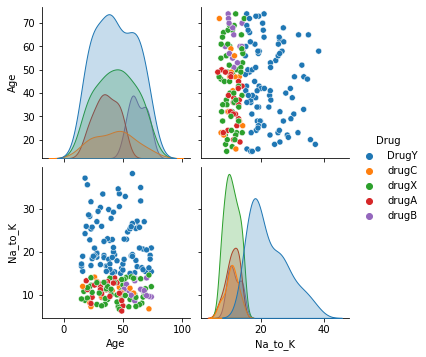

In [5]:
sns.pairplot(Drugs_data,hue='Drug')
plt.show()

**- There is an overlap between different drugs regarding Age. Age suitabilty as a drug prediction feature is not clear from this visualization**<br>
**- It can be seen that patients with high Na_to_K received Drug Y. This is a good feature for prediction.**

### Age

Drug
DrugY    43.747253
drugA    35.869565
drugB    62.500000
drugC    42.500000
drugX    44.018519
Name: Age, dtype: float64 



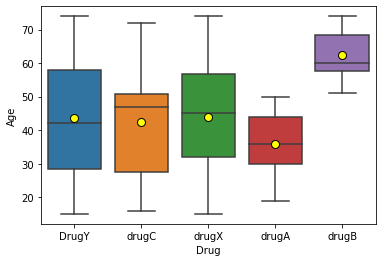

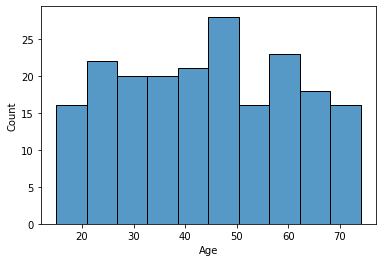

In [6]:
print(Drugs_data.groupby(['Drug'])['Age'].mean(),'\n')
sns.boxplot(x="Drug",y="Age",data=Drugs_data,showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"yellow","markeredgecolor":"black","markersize":"8"})
plt.show()
sns.histplot(data=Drugs_data,x='Age',bins=10)
plt.show()

- It can be seen that older patients were given Drug B.
- Age is ditributed quite homogenous among patients.

- no major outliers.

### Na_to_K

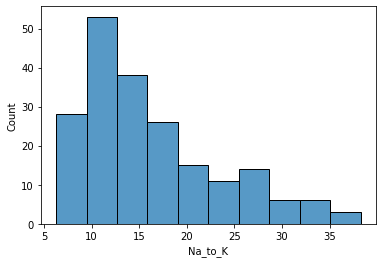

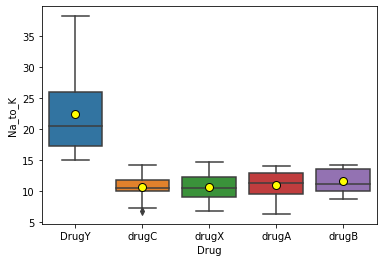

In [7]:
sns.histplot(data=Drugs_data,x='Na_to_K',bins=10)
plt.show()
sns.boxplot(x="Drug",y="Na_to_K",data=Drugs_data,showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"yellow","markeredgecolor":"black","markersize":"8"})
plt.show()

- It can be seen that Drug Y was given to patients with higher Na_to_k ratio. 
- no major outliers.
-  is left skewed?

### BP

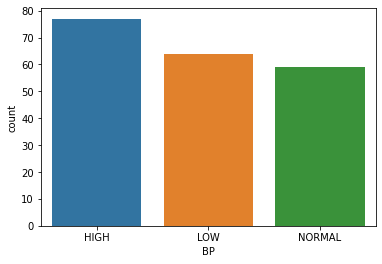

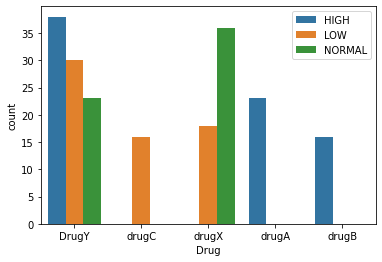

In [8]:
sns.countplot(x=Drugs_data['BP'])
plt.show()
sns.countplot(data=Drugs_data,x='Drug',hue='BP')
plt.legend(loc='upper right')
plt.show()

- Drug C was given only to patients with low BP
- Drugs A,B were given only to patients with High BP

### Cholesterol

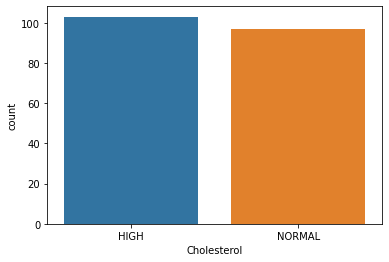

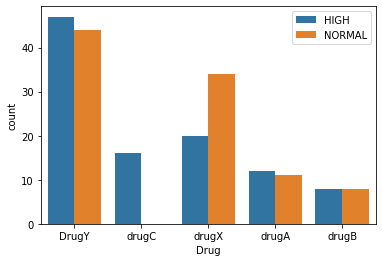

In [9]:
sns.countplot(x=Drugs_data['Cholesterol'])
plt.show()
sns.countplot(data=Drugs_data,x='Drug',hue='Cholesterol')
plt.legend(loc='upper right')
plt.show()

- Drug C was given only to patients with High Cholesterol

### 'Sex' feature  

M    0.52
F    0.48
Name: Sex, dtype: float64


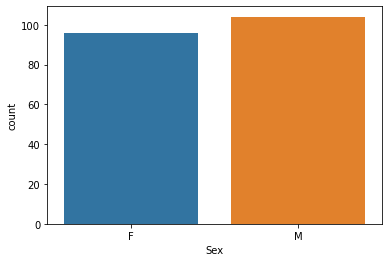

In [10]:
print(Drugs_data.Sex.value_counts(normalize=True))
sns.countplot(x=Drugs_data['Sex'])
plt.show()

- male and female patients are evenly represented. 

**I will use previous plots to examine 'Sex' feature as a prediction feature**

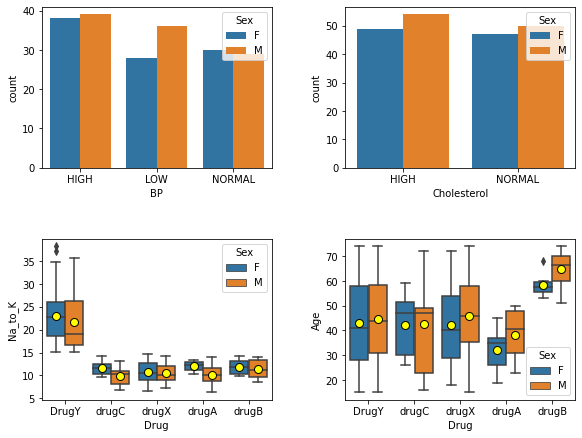

In [11]:
fig, axes = plt.subplots(2,2,figsize=(9,7))
sns.countplot(x=Drugs_data['BP'],hue=Drugs_data['Sex'],ax=axes[0,0])
sns.countplot(x=Drugs_data['Cholesterol'],hue=Drugs_data['Sex'],ax=axes[0,1])
sns.boxplot(x="Drug",y="Na_to_K",data=Drugs_data,hue='Sex',showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"yellow","markeredgecolor":"black","markersize":"8"},ax=axes[1,0])
sns.boxplot(x="Drug",y="Age",data=Drugs_data,hue='Sex',showmeans=True,
            meanprops={"marker":"o","markerfacecolor":"yellow","markeredgecolor":"black","markersize":"8"},ax=axes[1,1])
fig.tight_layout(pad=4.0)

plt.show()

- Although 'Sex' is evenly represented in the data, there is no noticable difference in drug type which is associated with sex.

## Exploring target feature 'Drug':

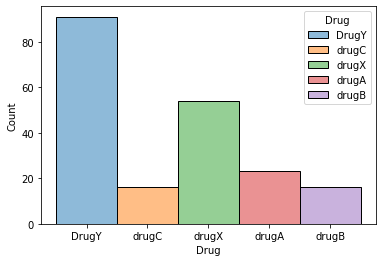

In [12]:
sns.histplot(data=Drugs_data,x='Drug',hue='Drug')
plt.show()

In [13]:
Drugs_data.Drug.value_counts(normalize=True)

DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: Drug, dtype: float64

- Target variable is left skewed

## EDA conclusions:
- There are no missing values.
- 2 numerical columns: 'Age', 'Na_to_K'
- 3 categorical columns: nominal: 'Sex',  ordinal: 'BP', 'Cholesterol'
- Target 'Drug' is categorical (nominal).

Sex:<br>
No noticable difference in drug type which is associated with feature 'sex'. Hence it might be not relevant for prediction.<br><br><br>
The following features seems to be good features for prediction: <br><br>
Age: <br>
Drug B was mostly given to older patients. <br><br>
<br>
Blood pressure: <br>
Drugs A and B were more appropriate for patiens with high BP.<br>
Drug C was more appropriate for patiens with low BP.<br><br>
Cholesterol:<br>
Drug C was more appropriate for patiens with high cholesterol.<br><br>
Na_to_K:<br>
Drug Y was more appropriate for patiens with high Na_to_K

In [14]:
Drugs_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Preparing data sets and target

Splitting the data set into training set and test set:

In [15]:
y=Drugs_data.Drug  
Drugs_data=Drugs_data.drop('Drug',axis=1)
x_train,x_test,y_train,y_test=train_test_split(Drugs_data,y,train_size=0.6,random_state=0)

## Data types: 

**preparing numerical and categorical columns for encoding:**

In [16]:
numerical_cols= Drugs_data.select_dtypes(['int64','float64'])
print('Numerical cols:',numerical_cols.columns)

Numerical cols: Index(['Age', 'Na_to_K'], dtype='object')


Categorical columns and unique values:

In [17]:
categorical_cols=Drugs_data.select_dtypes(['object'])
for col in list(categorical_cols.columns):
    print(col,' : ',categorical_cols[col].unique()) 

Sex  :  ['F' 'M']
BP  :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol  :  ['HIGH' 'NORMAL']


**Seperating nominal and ordinal columns. train set and test set are handeled seperately!**

In [18]:
# train set:
train_nominal=x_train.Sex
train_ordinal=x_train[['BP','Cholesterol']]
# test set: 
test_nominal=x_test.Sex
test_ordinal=x_test[['BP','Cholesterol']]

In [19]:
print(train_nominal.shape)
print(train_ordinal.shape)
print(test_nominal.shape)
print(test_ordinal.shape)

(120,)
(120, 2)
(80,)
(80, 2)


In order to use sklearn algorithms, train_nominal and test_nominal need to be reshaped.

In [20]:
train_nominal=np.array(train_nominal).reshape(-1,1)
test_nominal=np.array(test_nominal).reshape(-1,1)

In [21]:
print(train_nominal.shape)
print(test_nominal.shape)

(120, 1)
(80, 1)


## Encoding

Encoding the nominal feature 'Sex': 

In [22]:
OHencoder=OneHotEncoder(handle_unknown='ignore', sparse=False)
OHencoder.fit(train_nominal)
train_nominal_encoded=pd.DataFrame(OHencoder.transform(train_nominal))
test_nominal_encoded=pd.DataFrame(OHencoder.transform(test_nominal))

As can be seen below, feature 'Sex' is now appears as 2 columns, but the names are not clear. 

In [23]:
print(train_nominal_encoded.head(),'\n')
print(test_nominal_encoded.head())

     0    1
0  0.0  1.0
1  1.0  0.0
2  0.0  1.0
3  1.0  0.0
4  0.0  1.0 

     0    1
0  0.0  1.0
1  1.0  0.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0


I will use 'get_feature_names_out' attribute:

In [24]:
train_nominal_encoded.columns=OHencoder.get_feature_names_out(['Sex'])
test_nominal_encoded.columns=OHencoder.get_feature_names_out(['Sex'])
print(train_nominal_encoded.head(),'\n')
print(test_nominal_encoded.head())

   Sex_F  Sex_M
0    0.0    1.0
1    1.0    0.0
2    0.0    1.0
3    1.0    0.0
4    0.0    1.0 

   Sex_F  Sex_M
0    0.0    1.0
1    1.0    0.0
2    0.0    1.0
3    0.0    1.0
4    0.0    1.0


**Encoding the ordinal features:** <br> The default is numbering the categories alphabetically, which is not right for this case (because order matters). <br> So I will use the 'categories' parameter of the OrdinalEncoder

In [25]:
ORencoder=OrdinalEncoder(categories=[['LOW','NORMAL','HIGH'],['NORMAL','HIGH']])
ORencoder.fit(train_ordinal)
train_ordinal_encoded=pd.DataFrame(ORencoder.transform(train_ordinal))
test_ordinal_encoded=pd.DataFrame(ORencoder.transform(test_ordinal))

In [26]:
print(train_ordinal_encoded.head(),'\n')
print(test_ordinal_encoded.head())

     0    1
0  2.0  1.0
1  2.0  1.0
2  2.0  0.0
3  0.0  1.0
4  2.0  0.0 

     0    1
0  0.0  1.0
1  1.0  1.0
2  0.0  1.0
3  2.0  0.0
4  1.0  1.0


As above, to have clear names for the columns, I will use 'feature_names_in_' attribute:

In [27]:
train_ordinal_encoded.columns=ORencoder.feature_names_in_
test_ordinal_encoded.columns=ORencoder.feature_names_in_
print(train_ordinal_encoded.head(),'\n')
print(test_ordinal_encoded.head())

    BP  Cholesterol
0  2.0          1.0
1  2.0          1.0
2  2.0          0.0
3  0.0          1.0
4  2.0          0.0 

    BP  Cholesterol
0  0.0          1.0
1  1.0          1.0
2  0.0          1.0
3  2.0          0.0
4  1.0          1.0


**Next step is to create a full data set which is ready for prediction: numerical + ordinal + nominal features.**<br> steps are as follows:<br> 
- drop original categoical columns.
- concatenate with the encoded columns.

Drop:

In [28]:
x_train_encoded=x_train.drop(categorical_cols.columns,axis=1)
x_test_encoded=x_test.drop(categorical_cols.columns,axis=1)

Let's have a look at the different DF which are about to be concatenated:

Train set:

In [29]:
print(x_train_encoded.head(),'\n')
print(train_nominal_encoded.head(),'\n')
print(train_ordinal_encoded.head())

     Age  Na_to_K
187   47   10.403
46    37   13.091
138   51   11.343
195   56   11.567
108   72    9.677 

   Sex_F  Sex_M
0    0.0    1.0
1    1.0    0.0
2    0.0    1.0
3    1.0    0.0
4    0.0    1.0 

    BP  Cholesterol
0  2.0          1.0
1  2.0          1.0
2  2.0          0.0
3  0.0          1.0
4  2.0          0.0


Since the indices are different, 'reset_index' method will be used, and all 3 DF will be cocatenated:

In [30]:
x_train_encoded=pd.concat([x_train_encoded.reset_index(),train_nominal_encoded,train_ordinal_encoded],axis=1)

Test set:

In [31]:
x_test_encoded=pd.concat([x_test_encoded.reset_index(),test_nominal_encoded,test_ordinal_encoded],axis=1)

In [32]:
print(x_train_encoded.head(),'\n')
print(x_test_encoded.head())

   index  Age  Na_to_K  Sex_F  Sex_M   BP  Cholesterol
0    187   47   10.403    0.0    1.0  2.0          1.0
1     46   37   13.091    1.0    0.0  2.0          1.0
2    138   51   11.343    0.0    1.0  2.0          0.0
3    195   56   11.567    1.0    0.0  0.0          1.0
4    108   72    9.677    0.0    1.0  2.0          0.0 

   index  Age  Na_to_K  Sex_F  Sex_M   BP  Cholesterol
0     18   23    7.298    0.0    1.0  0.0          1.0
1    170   28   12.879    1.0    0.0  1.0          1.0
2    107   42   20.013    0.0    1.0  0.0          1.0
3     98   20   35.639    0.0    1.0  2.0          0.0
4    177   25   19.011    0.0    1.0  1.0          1.0


In [33]:
print(x_train_encoded.isnull().sum(),'\n')
print(x_train_encoded.info(),'\n')
print(x_test_encoded.isnull().sum())

print(x_test_encoded.info())

index          0
Age            0
Na_to_K        0
Sex_F          0
Sex_M          0
BP             0
Cholesterol    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        120 non-null    int64  
 1   Age          120 non-null    int64  
 2   Na_to_K      120 non-null    float64
 3   Sex_F        120 non-null    float64
 4   Sex_M        120 non-null    float64
 5   BP           120 non-null    float64
 6   Cholesterol  120 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 6.7 KB
None 

index          0
Age            0
Na_to_K        0
Sex_F          0
Sex_M          0
BP             0
Cholesterol    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   inde

### Next steps:<br>
- Target encoding
- Choosing a model for predictions.
- Error evaluation.